### Import Modules


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance


###Ear Aspect Ratio and Mouth Aspect Ratio Calculation

In [ ]:
def calculate_ear(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def calculate_mar(mouth):
    A = distance.euclidean(mouth[2], mouth[10])
    B = distance.euclidean(mouth[3], mouth[9])
    C = distance.euclidean(mouth[4], mouth[8])
    D = distance.euclidean(mouth[0], mouth[6])
    mar = (A + B + C) / (3.0 * D)
    return mar


###Load Models

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
facemark = cv2.face.createFacemarkLBF()
facemark.loadModel("lbfmodel.yaml")


###Implementation

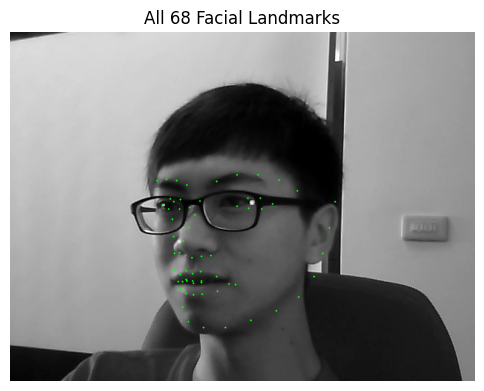

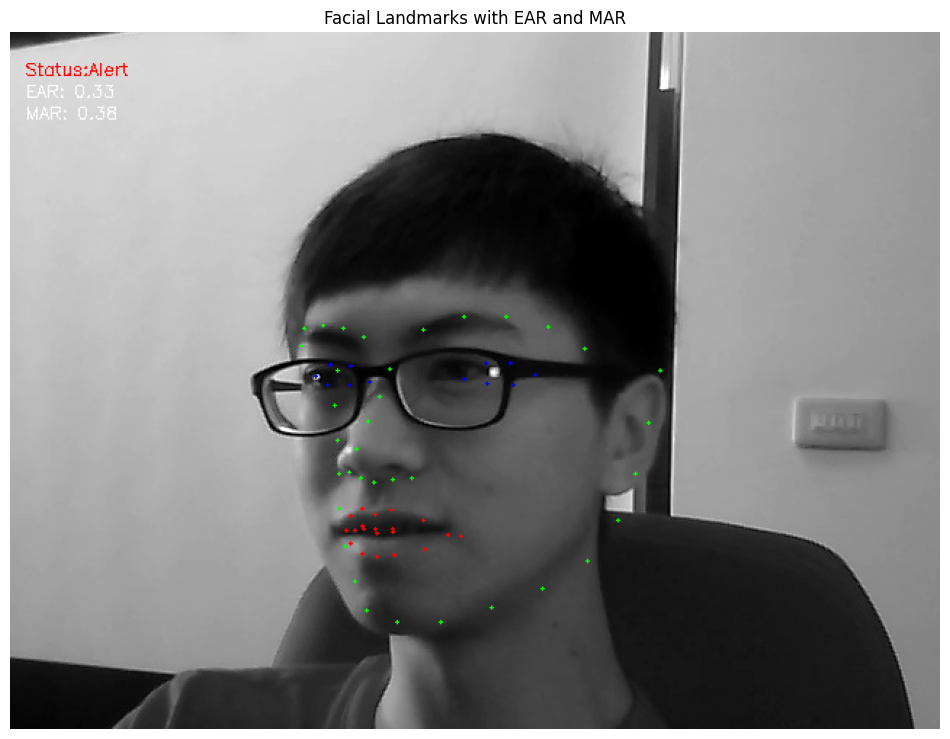

In [ ]:
img = cv2.imread("testimg.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=3, minSize=(60, 60))
ok, landmarks = facemark.fit(gray, faces)

img_vis = img.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
color_landmark = (0, 255, 0)
color_eye = (255, 0, 0)
color_mouth = (0, 0, 255)

if ok:
    for i in range(len(faces)):
        face_landmarks = np.array(landmarks[i][0], dtype=np.int32)
        x, y, w, h = cv2.boundingRect(face_landmarks)

        left_eye = face_landmarks[36:42]
        right_eye = face_landmarks[42:48]
        mouth = face_landmarks[48:68]


        img_all = img.copy()
        for point in face_landmarks:
            cv2.circle(img_all, tuple(point), 1, color_landmark, -1)

        img_all_rgb = cv2.cvtColor(img_all, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(6, 6))
        plt.imshow(img_all_rgb)
        plt.title("All 68 Facial Landmarks")
        plt.axis('off')
        plt.show()


        left_ear = calculate_ear(left_eye)
        right_ear = calculate_ear(right_eye)
        avg_ear = (left_ear + right_ear) / 2.0
        mar = calculate_mar(mouth)


        for point in face_landmarks:
            cv2.circle(img_vis, tuple(point), 1, color_landmark, -1)
        for point in np.concatenate([left_eye, right_eye]):
            cv2.circle(img_vis, tuple(point), 1, color_eye, -1)
        for point in mouth:
            cv2.circle(img_vis, tuple(point), 1, color_mouth, -1)


        text_y_base = max(y - 10, 10)
        line_spacing = 20
        status = "Alert"
        if avg_ear < 0.25 and mar > 0.6:
            status = "Drowsy + Yawning"
        elif avg_ear < 0.25:
            status = "Drowsy"
        elif mar > 0.6:
            status = "Yawning"

        cv2.putText(img_vis, f"Status:{status}", (10, 30), font, 0.4, (0, 0, 255), 1)
        cv2.putText(img_vis, f"EAR: {avg_ear:.2f}", (10, 45), font, 0.4, (255, 255, 255), 1)
        cv2.putText(img_vis, f"MAR: {mar:.2f}", (10,60), font, 0.4, (255, 255, 255), 1)
else:
    cv2.putText(img_vis, "No face or landmarks detected!", (30, 30), font, 0.4, (0, 0, 255), 1)


img_rgb = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Facial Landmarks with EAR and MAR")
plt.show()
